# Overall Statsitical Properties

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import os.path
from functools import reduce
import tempfile


In [2]:
sys.path.append('..')
from utils.kaggle import get_global_parameters, calc_contest_metric
from utils.preprocessing import encode_mean_level
from utils.mlflow_experiments import retrieve_artifacts
global_parms = get_global_parameters()


In [3]:
pd.options.display.max_rows = 1000


## Retrieve sample data for eda

In [4]:

# Run Id for sample data
RUN_ID='4b20d2c58c6f44beb36528a1542f9551'

tmpdir = tempfile.mkdtemp()

retrieve_artifacts(RUN_ID, '.', tmpdir)


train_samp = pd.read_pickle(os.path.join(tmpdir,'sample.pkl'))
train_samp.shape

(118108, 434)

In [5]:
train_samp = train_samp.drop(['TransactionID'],axis=1)

## Split numeric and character variables

In [6]:
char_predictors = [col for col in train_samp.columns if train_samp[col].dtype.name == 'object']

In [7]:
num_predictors = [col for col in train_samp.columns if train_samp[col].dtype.name != 'object']

## Dataframe for numeric perdictors

In [8]:
num_df = train_samp[num_predictors]
num_df.shape

(118108, 402)

In [9]:
def calc_pct_missing(df):
    return df.isnull().sum()/df.shape[0] * 100

def calc_overall_stats(df):
    desc = df.describe().T
    skew = pd.DataFrame(df.skew(), columns=['skew'])
    nunique = pd.DataFrame(df.nunique(), columns=['nunique'])
    pct_missing = pd.DataFrame(df.isnull().sum()/train_samp.shape[0] * 100, columns=['pct_missing']) 
    dtype = pd.DataFrame(df.dtypes, columns=['dtype'])

    return reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True), 
          [dtype, nunique, pct_missing, skew, desc])
    
def calc_isFraud_stats(df):
    desc = df.groupby('isFraud').describe().stack(0).swaplevel(0,1).sort_index()
    skew = pd.DataFrame(df.groupby('isFraud').skew().stack(0).swaplevel(0,1).sort_index(), columns=['skew'])
    nunique = pd.DataFrame(df.groupby('isFraud').nunique().stack(0).swaplevel(0,1).sort_index(), columns=['nunique'])

    return reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True), 
          [ nunique, skew, desc])[['nunique','skew', 'count', 'mean', 'std','min', '25%', '50%', '75%', 'max']]
# pct_missing,

In [10]:
numeric_stats = calc_overall_stats(num_df)
numeric_stats

,dtype,nunique,pct_missing,skew,count,mean,std,min,25%,50%,75%,max
isFraud,int64,2,0.000000,5.058956,118108.0,3.501880e-02,1.838281e-01,0.000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
TransactionDT,int64,117427,0.000000,0.132674,118108.0,7.368210e+06,4.612972e+06,86469.000,3.023825e+06,7.278750e+06,1.123689e+07,1.581109e+07
TransactionAmt,float64,8643,0.000000,22.850611,118108.0,1.359070e+02,2.506553e+02,0.251,4.397000e+01,6.900000e+01,1.250000e+02,3.193739e+04
card1,int64,8171,0.000000,-0.036554,118108.0,9.880470e+03,4.893335e+03,1009.000,6.019000e+03,9.633000e+03,1.415300e+04,1.839500e+04
card2,float64,500,1.565516,-0.206907,116259.0,3.630303e+02,1.579998e+02,100.000,2.150000e+02,3.610000e+02,5.120000e+02,6.000000e+02
card3,float64,91,0.271785,2.080075,117787.0,1.532058e+02,1.129837e+01,100.000,1.500000e+02,1.500000e+02,1.500000e+02,2.310000e+02
card5,float64,74,0.749314,-1.241132,117223.0,1.995226e+02,4.108351e+01,100.000,1.660000e+02,2.260000e+02,2.260000e+02,2.370000e+02
addr1,float64,177,11.012802,0.374666,105101.0,2.906293e+02,1.016923e+02,100.000,2.040000e+02,2.990000e+02,3.300000e+02,5.400000e+02
addr2,float64,46,11.012802,-14.436860,105101.0,8.679425e+01,2.734123e+00,10.000,8.700000e+01,8.700000e+01,8.700000e+01,1.020000e+02
dist1,float64,1831,59.664883,5.370178,47639.0,1.158911e+02,3.644295e+02,0.000,3.000000e+00,8.000000e+00,2.400000e+01,1.028600e+04


In [11]:
numeric_stats_by_isFraud = calc_isFraud_stats(num_df)
numeric_stats_by_isFraud

nunique        skew     count          mean  \
               isFraud                                                
C1             0            624   24.504779  113972.0  1.342345e+01   
               1            249   12.017734    4136.0  3.753941e+01   
C10            0            420   25.445961  113972.0  4.942925e+00   
               1            125   12.598067    4136.0  2.061412e+01   
C11            0            551   22.949820  113972.0  9.786044e+00   
               1            188   11.333481    4136.0  2.555319e+01   
C12            0            295   27.443827  113972.0  3.833380e+00   
               1            150   13.438203    4136.0  1.873477e+01   
C13            0           1013    9.002973  113972.0  3.254246e+01   
               1            181   10.468691    4136.0  2.692166e+01   
C14            0            516   16.938100  113972.0  8.153336e+00   
               1            101   10.352739    4136.0  1.160034e+01   
C2             0            534   24.403077  113972.0  1.429455e+01   
               1            270   10.990111    4136.0  4.723598e+01   
C3             0             13   84.813983  113972.0  5.817218e-03   
               1              2   45.458765    4136.0  4.835590e-04   
C4             0            382   22.922704  113972.0  3.727907e+00   
               1            112   10.750589    4136.0  1.658559e+01   
C5             0            280    5.736424  113972.0  5.613537e+00   
               1             56   11.320168    4136.0  1.575677e+00   
C6             0            527   20.415345  113972.0  8.735137e+00   
               1            139   10.609812    4136.0  1.863395e+01   
C7             0            293   27.183682  113972.0  2.717676e+00   
               1             98   13.472210    4136.0  1.219536e+01   
C8             0            358   26.338270  113972.0  4.778876e+00   
               1            157   12.896007    4136.0  2.236678e+01   
C9             0            190    5.695185  113972.0  4.505607e+00   
               1             56   10.733078    4136.0  1.923356e+00   
D1             0            641    1.776037  113732.0  9.612694e+01   
               1            365    3.490254    4125.0  3.805261e+01   
D10            0            728    1.361986   99435.0  1.263785e+02   
               1            396    2.684373    3358.0  5.531656e+01   
D11            0            666    1.041785   60852.0  1.472880e+02   
               1            312    1.906368    1254.0  8.593780e+01   
D12            0            571    2.369822   11382.0  5.664787e+01   
               1            193    2.884712    1467.0  4.017246e+01   
D13            0            391    5.064392   10956.0  1.868802e+01   
               1             71    7.473572    1316.0  6.243921e+00   
D14            0            618    2.576904   10923.0  5.734121e+01   
               1            182    3.065231    1423.0  4.560647e+01   
D15            0            752    0.932293   96880.0  1.663345e+02   
               1            458    2.045774    3285.0  8.078600e+01   
D2             0            641    1.000247   60274.0  1.714899e+02   
               1            323    2.294947    1587.0  7.387209e+01   
D3             0            560    4.498699   63534.0  2.855351e+01   
               1            133    5.683523    1944.0  1.369805e+01   
D4             0            723    1.145159   81319.0  1.424617e+02   
               1            398    2.221714    2935.0  6.989165e+01   
D5             0            627    3.398312   53950.0  4.258973e+01   
               1            169    5.016347    2203.0  1.556151e+01   
D6             0            671    2.154054   13059.0  7.397779e+01   
               1            193    2.949026    1490.0  4.024832e+01   
D7             0            460    2.659277    6596.0  4.840843e+01   
               1            101    5.352164    1109.0  1.242561e+01   
D8             0           5508    2.095791   13

In [21]:
numeric_stats_by_isFraud.loc['card2']

,nunique,skew,count,mean,std,min,25%,50%,75%,max
isFraud,,,,,,,,,,
0,500,-0.204986,112209.0,362.887549,157.919073,100.0,215.0,361.0,512.0,600.0
1,211,-0.260225,4050.0,366.985432,160.189976,100.0,206.0,387.0,514.0,594.0


In [16]:
num_df[['isFraud','C1']].head()

,isFraud,C1
57903,0,1.0
400901,0,1.0
235736,0,2.0
200779,0,2.0
226515,0,1.0


In [19]:
y = np.log(num_df.C1 + 1)

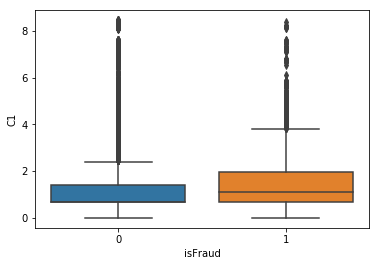

In [20]:
sns.boxplot(num_df.isFraud,y)

In [32]:
type(numeric_stats)

pandas.core.frame.DataFrame

In [38]:
numeric_stats['skew'].describe()

count    402.000000
mean      16.875334
std       29.737262
min      -94.179160
25%        3.021301
50%       10.955439
75%       22.823200
max      343.665535
Name: skew, dtype: float64

In [40]:
numeric_stats.loc[numeric_stats['std'] < 1]

,dtype,nunique,pct_missing,skew,count,mean,std,min,25%,50%,75%,max
isFraud,int64,2,0.000000,5.058956,118108.0,0.035019,0.183828,0.0,0.000000,0.000000,0.000000,1.000000
C3,float64,13,0.000000,86.235515,118108.0,0.005630,0.143003,0.0,0.000000,0.000000,0.000000,22.000000
D9,float64,24,87.305686,-0.593648,14993.0,0.562215,0.316640,0.0,0.208333,0.666666,0.833333,0.958333
V1,float64,2,47.415924,-94.179160,62106.0,0.999887,0.010616,0.0,1.000000,1.000000,1.000000,1.000000
V2,float64,8,47.415924,7.007718,62106.0,1.046276,0.246806,0.0,1.000000,1.000000,1.000000,8.000000
V3,float64,9,47.415924,5.410629,62106.0,1.078302,0.323818,0.0,1.000000,1.000000,1.000000,8.000000
V4,float64,7,47.415924,-0.374807,62106.0,0.848404,0.441137,0.0,1.000000,1.000000,1.000000,6.000000
V5,float64,7,47.415924,0.250158,62106.0,0.877918,0.474999,0.0,1.000000,1.000000,1.000000,6.000000
V6,float64,9,47.415924,6.849592,62106.0,1.047419,0.247403,0.0,1.000000,1.000000,1.000000,9.000000
V7,float64,10,47.415924,5.435294,62106.0,1.074099,0.307986,0.0,1.000000,1.000000,1.000000,9.000000


        isFraud           y     log_y
57903         0    0.000000  0.000000
400901        0    0.000000  0.000000
235736        0    0.000000  0.000000
200779        0  168.800003  5.134621
226515        0  114.949997  4.753159


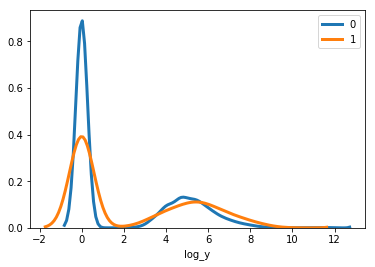

In [57]:
subset = num_df[['isFraud', 'V127']].copy()
subset.columns = ['isFraud', 'y']
subset['log_y'] = np.log(1 + subset['y'])
print(subset.head())

for isFraud in [0, 1]:
    # Draw the density plot
    sns.distplot(subset.loc[subset.isFraud == isFraud ,'log_y'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3}, label = isFraud)